# **PROJETO PERCEPTRON**

**Este projeto utilizado como projeto de estudos para a área de Machine Learning, NLP e Data Science com intuito de demonstrar conhecimento sobre os assuntos.**

**Elaborado por EDMUNDO LOPES SILVA**

[LINKEDIN](https://www.linkedin.com/in/edmundo-lopes-silva-7ab3b4163/)

## Rede Perceptron

O **Perceptron** é um modelo de rede neural simples desenvolvido por Frank Rosenblatt em 1958. Ele é um classificador linear, ou seja, é capaz de separar dados que podem ser divididos por uma linha reta em problemas de duas classes.

### Como funciona o Perceptron:

- O Perceptron recebe um vetor de entradas \(X = [x_1, x_2, ..., x_n]\).
- Cada entrada possui um peso associado \(W = [w_1, w_2, ..., w_n]\).
- Ele calcula a soma ponderada das entradas com os pesos: \(z = \sum_{i=1}^{n} w_i \cdot x_i + b\), onde \(b\) é o **bias**.
- O valor \(z\) é passado para uma **função de ativação** (neste caso, usamos a função degrau).
- A função degrau retorna \(1\) se \(z\) for maior que um limiar, e \(0\) caso contrário.

## Processo de Treinamento:

O treinamento de um Perceptron envolve ajustar os pesos de forma que ele consiga classificar corretamente as entradas. A regra de aprendizado é baseada no erro entre a saída prevista e a saída verdadeira:
\[
w_i = w_i + \eta \cdot (y_{\text{real}} - y_{\text{predito}}) \cdot x_i
\]
Onde:
- \(w_i\) são os pesos ajustáveis,
- \(\eta\) é a taxa de aprendizado,
- \(y_{\text{real}}\) é o rótulo verdadeiro,
- \(y_{\text{predito}}\) é a previsão do Perceptron,
- \(x_i\) é a entrada correspondente.

## Limitações:
- O Perceptron só pode resolver problemas **linearmente separáveis**, ou seja, ele falha em problemas como o **XOR**.
- É limitado a funções de ativação simples, como a função degrau, mas pode ser estendido com múltiplas camadas em um Perceptron Multicamadas (MLP).

Neste projeto, implementaremos um Perceptron de camada única para classificar dois conjuntos de dados em um plano 2D.

LINK DE EXPLICAÇÃO EM PORTUGUÊS: https://www.youtube.com/watch?v=0chlwnUKoHA&t=3s&pp=ygURcGVyY2VwdHJvbiBweXRob24%3D


# **CÓDIGO**

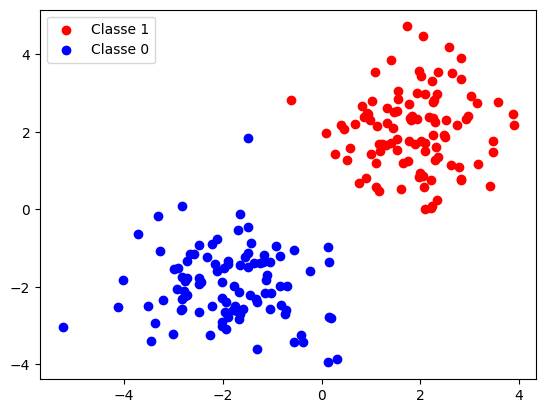

In [1]:
# Bibliotecas necessárias para o projeto
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados aleatórios para duas classes
np.random.seed(42)
n_samples = 100  # Número de amostras por classe

# Classe 1 (pontos centrados em torno de [2, 2])
X_class1 = np.random.randn(n_samples, 2) + np.array([2, 2]) # (pontos)
y_class1 = np.ones(n_samples) # (classes)

# Classe 0 (pontos centrados em torno de [-2, -2])
X_class0 = np.random.randn(n_samples, 2) + np.array([-2, -2]) # (pontos)
y_class0 = np.zeros(n_samples) # (classes)

# Concatenando os dados
X = np.vstack((X_class1, X_class0))  # Dados de entrada (pontos)
y = np.hstack((y_class1, y_class0))  # Rótulos de saída (classes)

# Visualizando os dados
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Classe 1')
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Classe 0')
plt.legend()
plt.show()

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate  # Taxa de aprendizado
        self.n_iters = n_iters  # Número de iterações
        self.activation_func = self._step_function  # Função de ativação (degrau)
        self.weights = None  # Pesos do perceptron
        self.bias = None  # Bias (termo de ajuste)

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Inicializando os pesos e o bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Treinamento do Perceptron
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Predição linear
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Atualização dos pesos se houver erro
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [3]:
# Instanciando o Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

# Treinando o modelo
perceptron.fit(X, y)

# Fazendo predições
predictions = perceptron.predict(X)

# Avaliando a acurácia
accuracy = np.sum(predictions == y) / len(y)
print(f'Acurácia: {accuracy * 100:.2f}%')


Acurácia: 100.00%


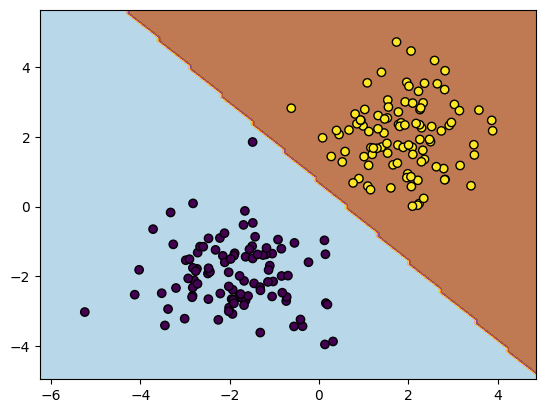

In [4]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

# Plotando a fronteira de decisão
plot_decision_boundary(X, y, perceptron)


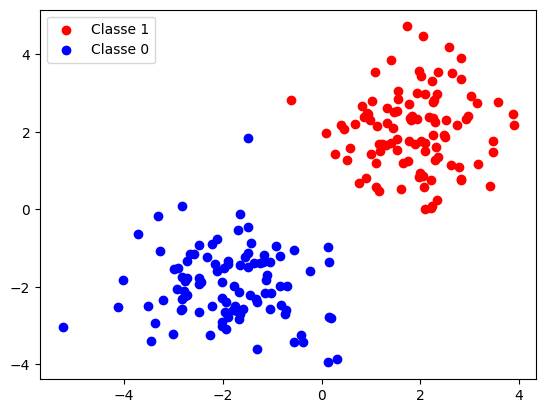

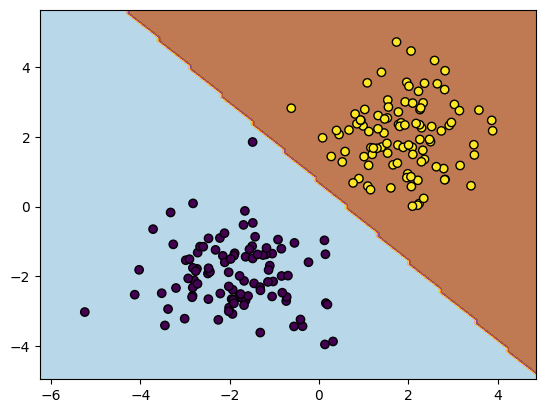

In [5]:
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Classe 1')
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Classe 0')
plt.legend()
plt.show()

plot_decision_boundary(X, y, perceptron)
